In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
# Создаем датафрейм из исходного файла
df = pd.read_excel('FPS_lecture_df_0_height-weignt (3).xlsx')
df.head()

,ID,Gender,Height,Weight
0,10001,Male,174.782639,78.652188
1,10002,Female,165.183571,74.332607
2,10003,Male,181.542046,81.693920
3,10004,Female,167.845912,75.530661
4,10005,Female,160.475255,72.213865


In [ ]:
# Формирование выборок
df_1 = df[df['Gender'] == 'Male'] # Создаем датафрейм с данными по полу 'Male' (мужчины)
df_2 = df[df['Gender'] == 'Female'] # Создаем датафрейм с данными по полу 'Female' (женщины)
# Сравниваем датафреймы между собой 
print('Выборкки имеют одинаковую длинну: ', len(df_1) == len(df_2)) # Выводим на печать нужный текст с получившимся результатом сравнения 

Выборкки имеют одинаковую длинну:  True


In [ ]:
# Описательные статистики мужчин
df_1.describe()

,ID,Height,Weight
count,1000.000000,1000.000000,1000.000000
mean,11002.281000,175.655759,79.045091
std,580.298598,7.331049,3.298972
min,10001.000000,153.429654,69.043344
25%,10498.000000,170.757381,76.840822
50%,11000.500000,175.575025,79.008761
75%,11506.250000,180.612933,81.275820
max,11998.000000,195.283831,87.877724


In [ ]:
# Описательные статистики женщин
df_2.describe()

,ID,Height,Weight
count,1000.000000,1000.000000,1000.000000
mean,10998.719000,161.420314,72.639141
std,574.961756,6.834302,3.075436
min,10002.000000,138.387486,62.274369
25%,10503.750000,156.704763,70.517143
50%,11000.500000,161.494158,72.672371
75%,11496.500000,165.859545,74.636795
max,12000.000000,186.460992,83.907447


<ipython-input-24-7896f23b8b35>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Weight'], 50); # Значение (50) это заданная плотность графика
<ipython-input-24-7896f23b8b35>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['Weight'], 50);


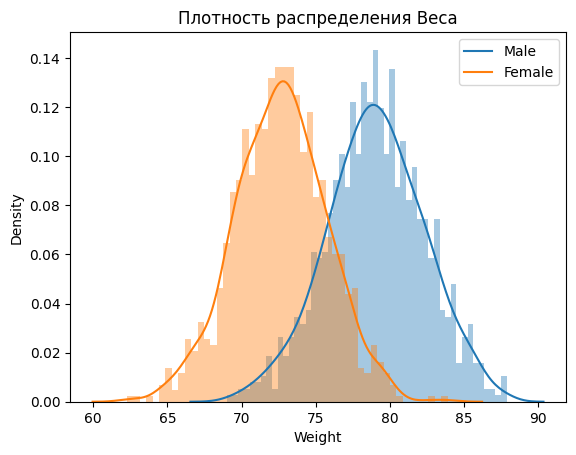

In [ ]:
# Визуализация пересечения интервалов веса мужчин и женщин
sns.distplot(df_1['Weight'], 50); # Значение (50) это заданная плотность графика 
sns.distplot(df_2['Weight'], 50);
plt.title('Плотность распределения Веса');
plt.legend(['Male', 'Female']);
plt.show();

In [ ]:
# Функия бинарной классификации по признаку пола
def func_bin_gender(row): # задаем функцию func_bin_gender
 if row['Gender'] == 'Male':
    return 1
 elif row['Gender'] == 'Female':
    return 0

In [ ]:
# Добавление столбца бинарной классификации пола
df['Gender(bin)'] = df.apply(func_bin_gender, axis=1) # Создаем столбец и применяем созданую выше функцию 
df

,ID,Gender,Height,Weight,Gender(bin)
0,10001,Male,174.782639,78.652188,1
1,10002,Female,165.183571,74.332607,0
2,10003,Male,181.542046,81.693920,1
3,10004,Female,167.845912,75.530661,0
4,10005,Female,160.475255,72.213865,0
...,...,...,...,...,...
1995,11996,Male,184.224224,82.900901,1
1996,11997,Male,180.164315,81.073942,1
1997,11998,Male,173.442407,78.049083,1
1998,11999,Female,164.588728,74.064928,0


In [ ]:
# Корреляция Роста к Весу
df['Height'].corr(df['Weight'])

1.0

In [ ]:
# Корреляция Пола к Росту
df['Gender(bin)'].corr(df['Height'])

0.7088094753460076

In [ ]:
# Корреляция Пола к Весу
df['Gender(bin)'].corr(df['Weight'])

0.7088094753460076

In [ ]:
# Матрица корреляции средствами pandas
df.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-28-a3d74fda921a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,ID,Height,Weight,Gender(bin)
ID,1.000000,0.000944,0.000944,0.003085
Height,0.000944,1.000000,1.000000,0.708809
Weight,0.000944,1.000000,1.000000,0.708809
Gender(bin),0.003085,0.708809,0.708809,1.000000


<ipython-input-29-b1e717e928b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


<Axes: >

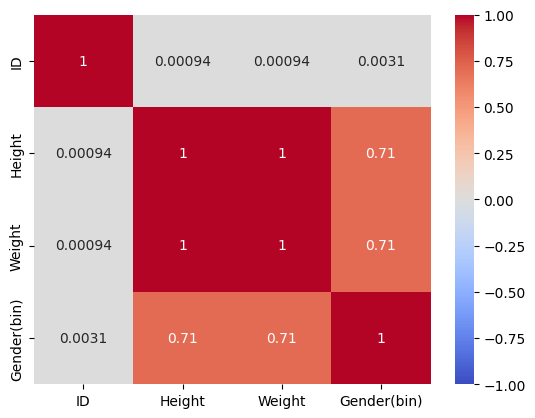

In [ ]:
# Матрица корреляции средствами визуализации seaborn (тепловая матрица)
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

## Построение Линейной регрессии

In [ ]:
from sklearn.linear_model import LinearRegression # Подключение библиотеки и модуля (LinearRegression) Линейной регрессии
regressor = LinearRegression()                    # Инициализация Линейной регрессии - создаем переменную regressor, записываем в неё модуль LinearRegression
regressor.fit(X, y)                               # Обучение Линейной регрессии. Задаем в fit(, y) сначала X признаки, после Y цель предсказаний 

LinearRegression()

In [ ]:
# Коэффициент прямой (проверка обучения)
a = regressor.intercept_ # Выведем Коэффициент и запишем в переменную
a

array([-1.42108547e-14])

In [ ]:
# Коэффициент наклона прямой (проверка обучения)
b = regressor.coef_ # Выведем Коэффициент и запишем в переменную
b

array([[0.45]])

In [ ]:
Height_pred = 170                     # Создаем переменную и записываем в нее значение (веса) для которого хотим сделать предсказание 
regressor.predict([[Height_pred]])    #  # Обращаемся к обученой модели regressor применяем к ней метод predict, указываем переменную Height_pred

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[76.5]])

In [ ]:
# Получение прогноза "в лоб" по уровнению прямой регрессии a + bx
a + b * Height_pred # (-1,42 + 0,45 * 170)

array([[76.5]])

Аналогичное построение регрессии для Женщин

In [ ]:
# Формирование выборок Роста и Веса для Женщин
X = df_2[['Height']]
y = df_2[['Weight']]

regressor = LinearRegression()                    # Инициализация Линейной регрессии
regressor.fit(X, y)                               # Обучение Линейной регрессии

# Коэффициент прямой
a = regressor.intercept_
# Коэффициент наклона прямой
b = regressor.coef_

Height_pred = 160                     # Значение Роста для получения Прогноза Веса
regressor.predict([[Height_pred]])    # Получение прогноза Линейной реграссии# Формирование выборок Роста и Веса для Женщин

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[72.]])